# Using Necessary Libraries 

In [1]:
import cv2 as cv 
import pandas as pd 
import numpy as np

## Read Image

#### Cell Details:
cv.waitKey(0) => wait window for infnite time to close the window (until user close)

In [12]:
img = cv.imread(r'F:\AI&DS\ComputerVision\OpenCvWork\Data\Photos\eagle.jpg')
cv.imshow('Lady', img)
cv.waitKey(0)

-1

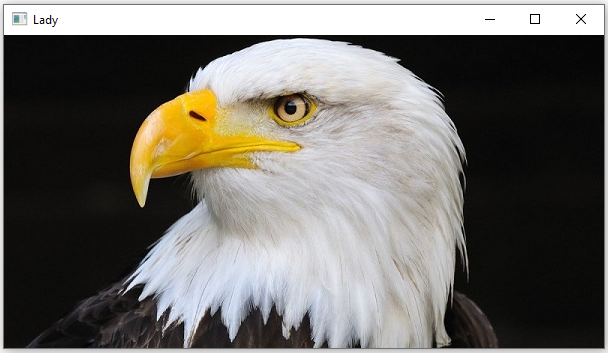

## Read video

1. frame => Read video from frame by frame
2. isTrue => Says wheter the frame was succesfully read in or not

In [15]:
video = cv.VideoCapture('Data//Videos//kitten.mp4')
while True:
    isTrue, frame = video.read()
    cv.imshow('vid',frame)
    if cv.waitKey(20) & 0xff == ord('q'):
        break
video.release()
cv.destroyAllWindows()

## Rescalnig image frame

##### Rescaling Function Details:

1. frame.shape[1] => frame width
2. frame.shape[0] => frame height
3. scale = 0.75 => is a default value


In [17]:
# Function that resize frame 
def rescaleFrame(frame, scale = 0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width, height)
    return cv.resize(frame, dimensions, interpolation = cv.INTER_AREA)

In [18]:
img = cv.imread(r'F:\AI&DS\ComputerVision\OpenCvWork\Data\Photos\eagle.jpg')
# dislpaying orignal image
cv.imshow('eagle', img)

# dislpaying rescaled image
rescaled_img = rescaleFrame(img)
cv.imshow('resized eagle', rescaled_img)
    
cv.waitKey(0)

-1

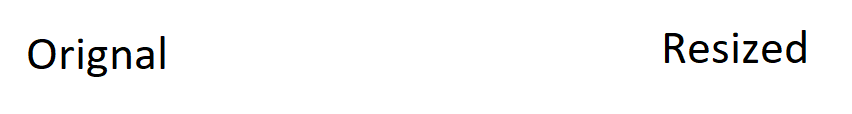

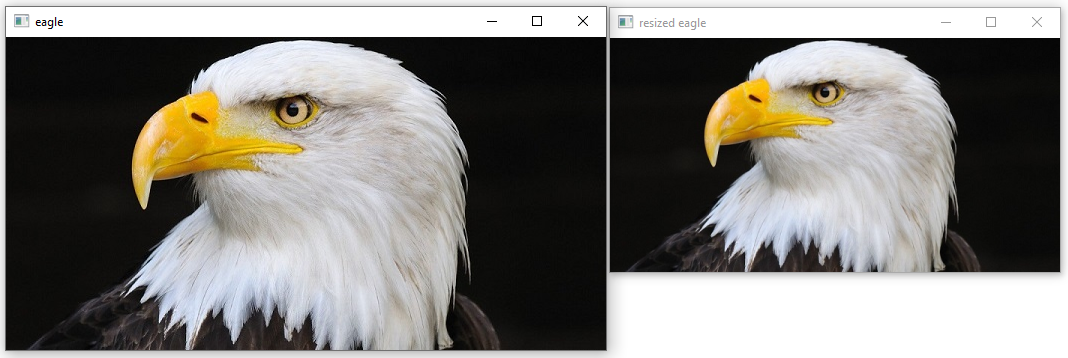


## Rescalnig video frame

In [10]:
video = cv.VideoCapture('Data//Videos//kitten.mp4')
while True:
    isTrue, frame = video.read()
    cv.imshow('vid',frame)
    rescaled_video = rescaleFrame(frame)
    cv.imshow('rescaledvideo',rescaled_video)
    
    if cv.waitKey(20) & 0xff == ord('q'):
        break
video.release()
cv.destroyAllWindows()

## Converting image to gray scale

In [22]:
img = cv.imread(r'F:\AI&DS\ComputerVision\OpenCvWork\Data\Photos\eagle.jpg')
# orignal image
cv.imshow('eagle', img)

# gray scale image 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('eagleGray', gray)

cv.waitKey(0)

-1

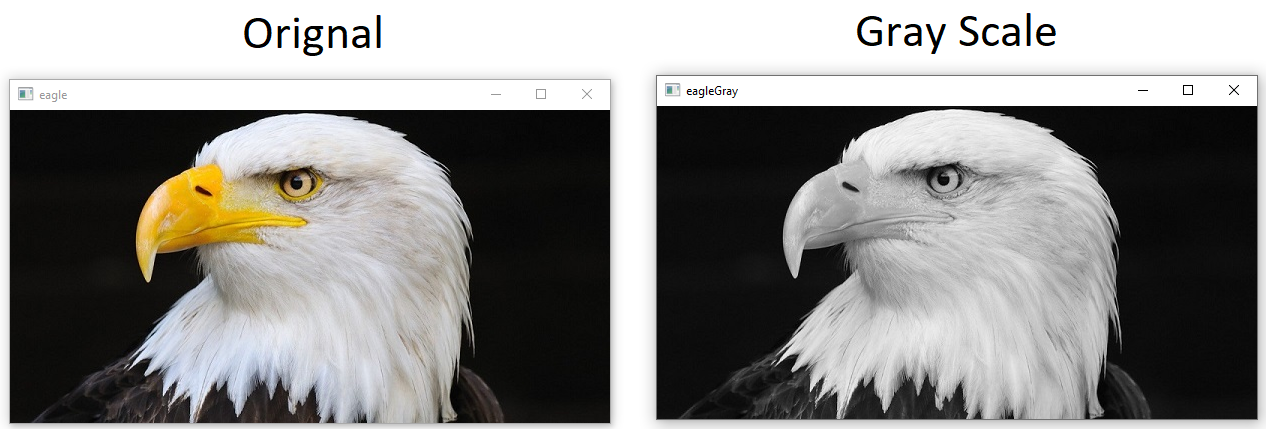


## Blurring image

(3,3) => kernal size, increase in value increase blurriness

In [21]:
img = cv.imread(r'F:\AI&DS\ComputerVision\OpenCvWork\Data\Photos\eagle.jpg')
# orignal image
cv.imshow('eagle', img)

# blur scale image 
blur = cv.GaussianBlur(img, (7,7) ,cv.BORDER_DEFAULT)
cv.imshow('eagleBlur', blur)

cv.waitKey(0)

-1

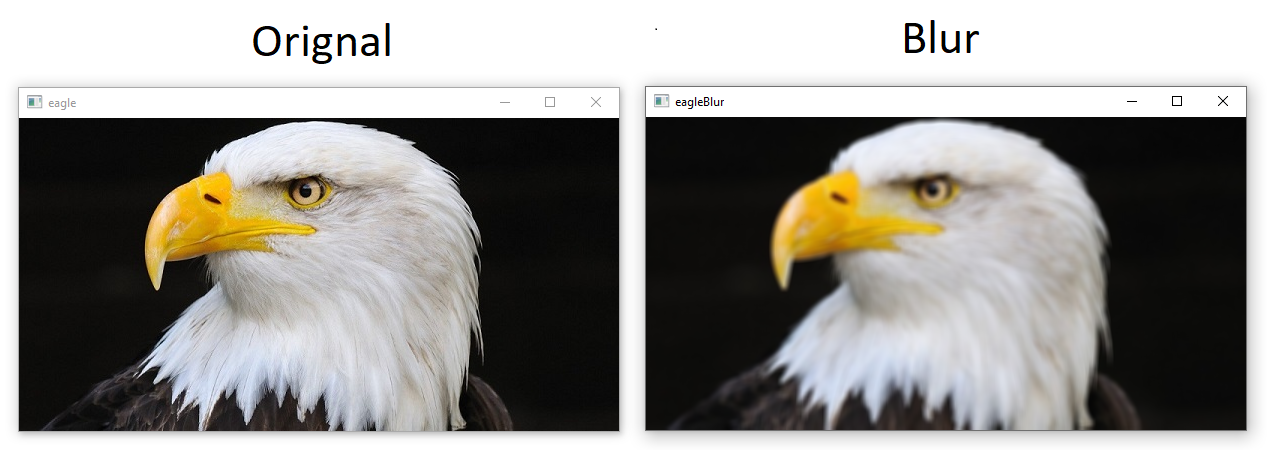

## Finding image edges

In [23]:
img = cv.imread(r'F:\AI&DS\ComputerVision\OpenCvWork\Data\Photos\eagle.jpg')
# orignal image
cv.imshow('eagle', img)

# blur scale image 
blur = cv.GaussianBlur(img, (3,3) ,cv.BORDER_DEFAULT)
cv.imshow('eagleBlur', blur)

# Edge cascade image
edge = cv.Canny(img, 125,175)
cv.imshow('eagleEdge', edge)

# For Reducing Extra edges use blur image
reduce_edge = cv.Canny(blur, 125,175)
cv.imshow('eagleEdge2', reduce_edge)

cv.waitKey(0)

-1

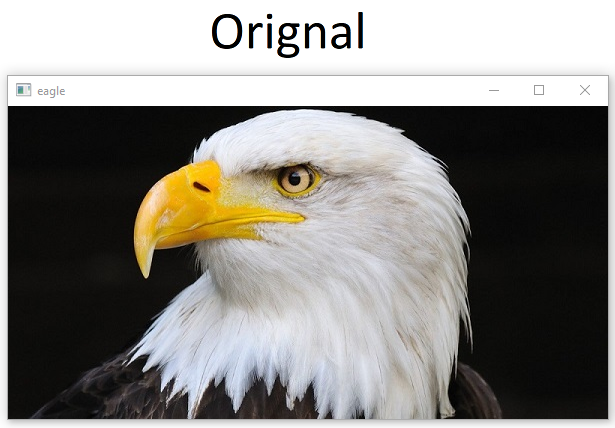

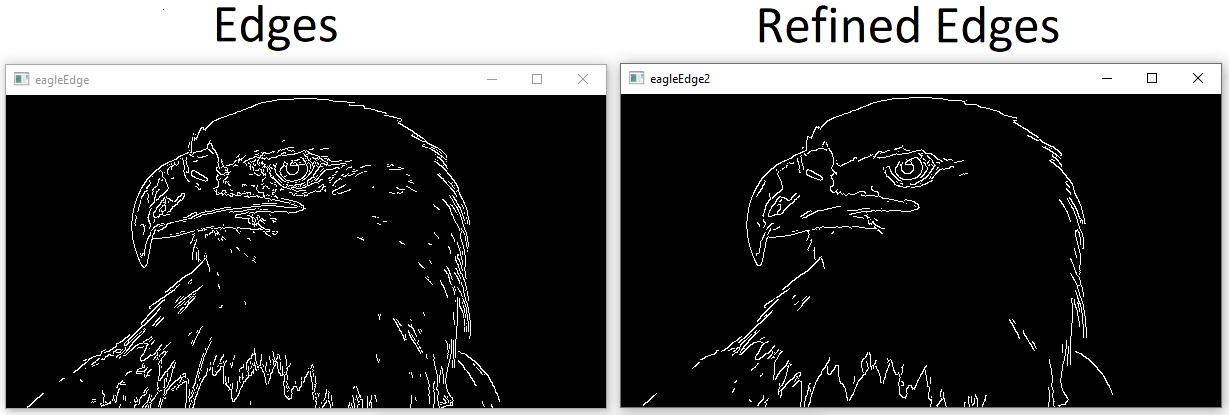

## Dilating image

In [24]:
img = cv.imread(r'F:\AI&DS\ComputerVision\OpenCvWork\Data\Photos\eagle.jpg')
# orignal image
cv.imshow('eagle', img)

# blur scale image 
blur = cv.GaussianBlur(img, (3,3) ,cv.BORDER_DEFAULT)
cv.imshow('eagleBlur', blur)

# For Reducing Extra edges use blur image
reduce_edge = cv.Canny(blur, 125,175)
cv.imshow('eagleEdge2', reduce_edge)

# For inreasing thinkness of edges
dilat_edge = cv.dilate(reduce_edge, (3,3), iterations =3)
cv.imshow('eagleDilat', dilat_edge)

cv.waitKey(0)

-1

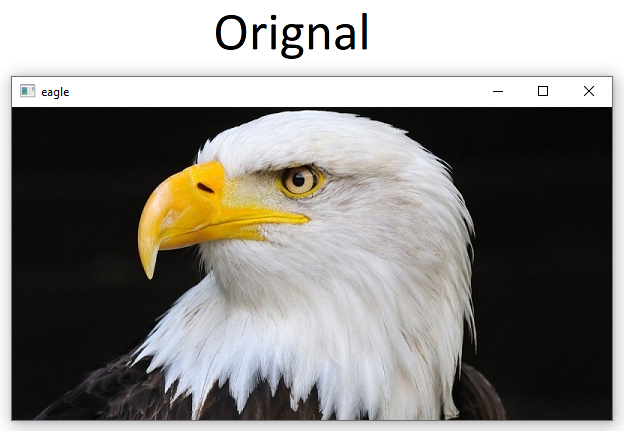

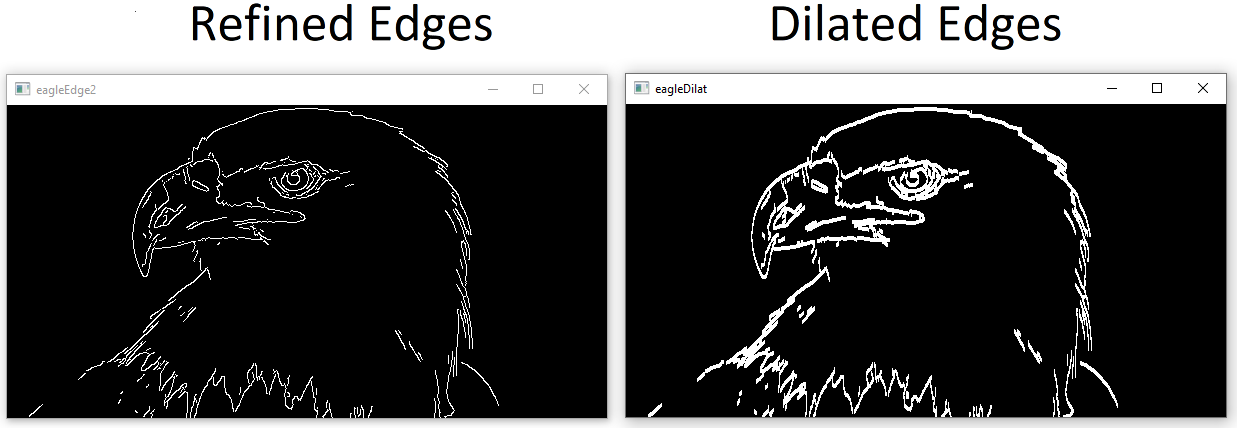

## Crop image

##### Cropped image detail:
img[100:200,200:600] => [y_point:height, x_point:wight]

In [ ]:
img = cv.imread(r'F:\AI&DS\ComputerVision\OpenCvWork\Data\Photos\eagle.jpg')
# orignal image
cv.imshow('eagle', img)
cropped_img = img[0:200,100:500]
cv.imshow('croped',cropped_img)

cv.waitKey(0)

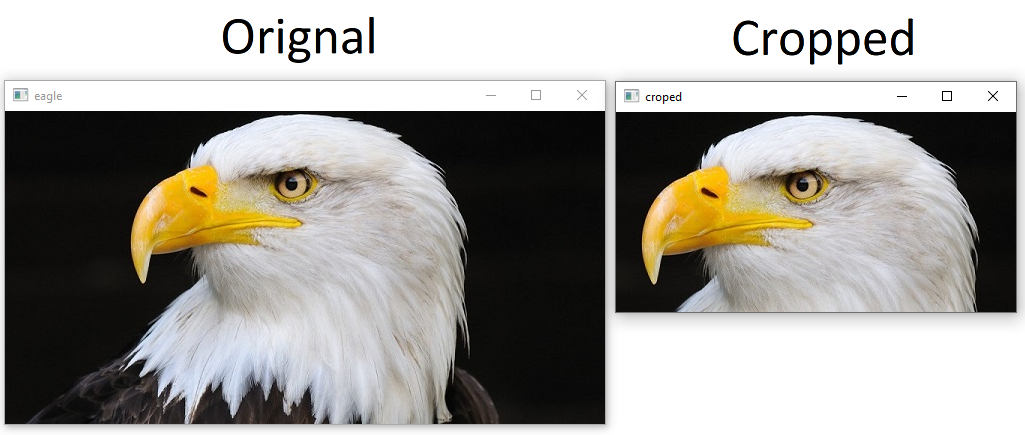

# Face Detection

face detection is performed using classifiers. A classifier is essentially an algorithm that decides whether a face is present or not.
there are two more advance classifier:
1. haarcasacade 
2. local binay patterns

Steps:
1. Convert image to grayscale: Face detection dose not envolve skin tone or the colors that are present in the image. These hard cascades essentially look at an object in an image and using the edges tries to determine whether it's a face or not.
2. Read haarcasacade classifier in a variable
3. Take rectangular coordinates of face thourgh detectMultiscale() method
4. Cropping image using img[y:y+h, x:x+w]
5. Displaying bounding box on face using cv.rectangle()

In [9]:
img = cv.imread(r'F:\AI&DS\ComputerVision\OpenCvWork\Data\Photos\Tony.jpg')
# orignal image
cv.imshow('Tony', img)

# gray scale image 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# getting haarcascade classifier
haar_cascade = cv.CascadeClassifier(r'F:\AI&DS\ComputerVision\cascadeFiles\haarcascade_frontalface_default.xml')

# getting coordinates
face_rect = haar_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors= 3)

# displaying bounding box
for (x,y,w,h) in face_rect:
    cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), thickness=2)

cv.imshow("faceDetected", img)
cv.waitKey(0)

-1

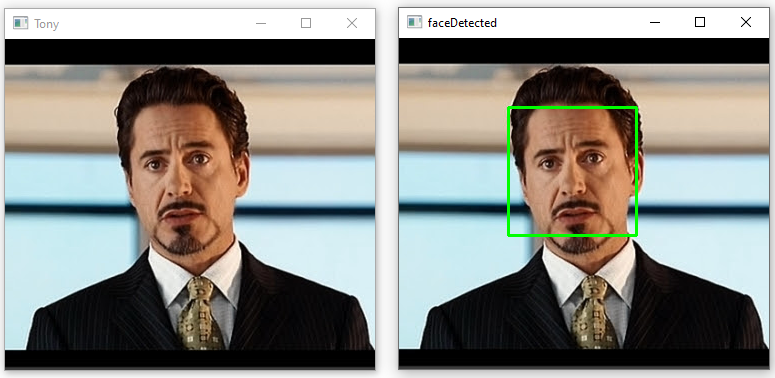